# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [2]:
# read the training dataset from Kaggle's Housing Prices competition into a DataFrame
train_raw = pd.read_csv('housing-prices/train.csv')
test_raw = pd.read_csv('housing-prices/test.csv')

In [3]:
train_raw.shape

(1460, 81)

In [4]:
test_raw.shape

(1459, 80)

In [5]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_raw.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [7]:
test_raw.isnull().sum().sort_values(ascending=False)

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Foundation        0
Id                0
Length: 80, dtype: int64

# Preprocessing
- Perform normality transformation
- Since some columns in the test set has NaN while train set does not, we merge the two dataset to do preprocessing.

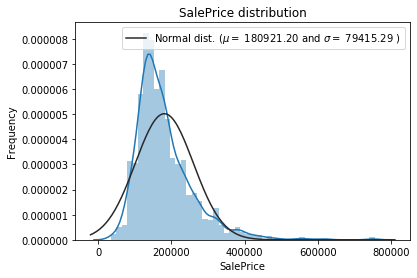

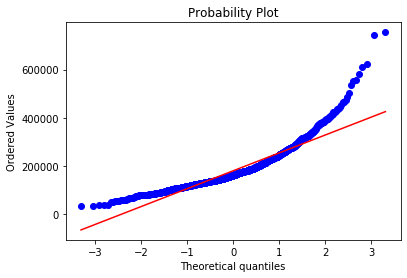

In [8]:
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns

sns.distplot(train_raw['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train_raw['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



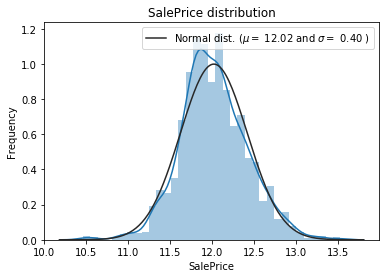

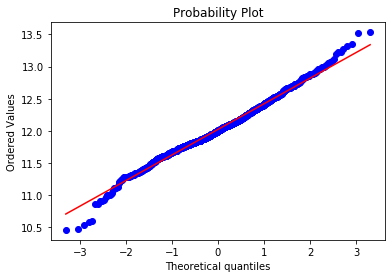

In [9]:
# get log transform
train_raw["SalePrice"] = np.log1p(train_raw["SalePrice"])

sns.distplot(train_raw['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train_raw['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()

After taking log-transform, the distribution of SalePrice is closer to Normal Distribution.

In [10]:
# merge train set and test set
data_raw = train_raw.append(test_raw,sort=False)

In [11]:
# drop columns where there are at least some number of NaN values
data = data_raw.dropna(axis=1, how='any', thresh = 1000)

# fill NULL values with median values
data = data.fillna(data.median()) 
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,12.001512
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,12.001512
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,12.001512
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,12.001512


## Dropping features
- Try dropping features that are highly correlated or uncorrelated with the label.

In [12]:
# check correlation matrix
corr_mat = data.corr()

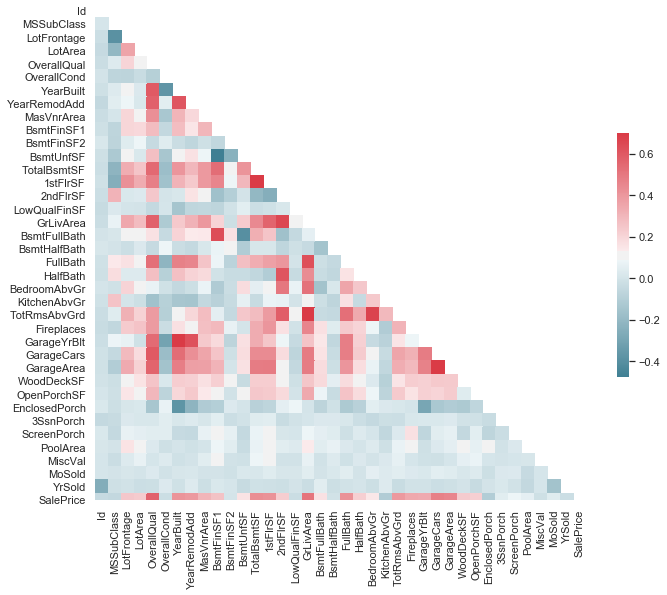

In [13]:
# plot correlation matrix
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.7,
            cbar_kws={"shrink": .5})

In [14]:
# dropping highly correlated features
# extract feature list
fea_list = [i for i in corr_mat]
fea_drop = []
n = len(fea_list)
for i in range(n):
    for j in range(i+1,n):
        # get feature pair
        fea1 = fea_list[i]
        fea2 = fea_list[j]
        
        # check for high correlation
        if abs(corr_mat[fea1][fea2] >= 0.8) and (fea1 is not 'SalePrice' or fea2 is not 'SalePrice'):
            if corr_mat['SalePrice'][fea1] < corr_mat['SalePrice'][fea2]:
                fea_drop.append(fea1)
            else:
                fea_drop.append(fea2)

fea_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [15]:
# drop feature
data = data.drop(columns=fea_drop)

In [16]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,12.001512
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,12.001512
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,12.001512
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,12.001512


In [17]:
# convert string data into categorical data
data = pd.get_dummies(data)
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


## Split Data

In [18]:
new_train = data.iloc[:1460]
new_test = data.iloc[1460:]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

in_pipeline = Pipeline([
        ('rb_scaler', RobustScaler()),
    ])

In [20]:
x_train = in_pipeline.fit_transform(new_train.drop(columns=['SalePrice']))
y_train = new_train.SalePrice

x_test = in_pipeline.fit_transform(new_test.drop(columns=['SalePrice']))
y_test = new_test.SalePrice

## Try RF

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1000, high=5000),
        'max_features': randint(low=1, high=261),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42,n_jobs=-1)
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [22]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.13694119964875726 {'max_features': 103, 'n_estimators': 4507}
0.1369929332354639 {'max_features': 107, 'n_estimators': 2095}
0.13907232918875906 {'max_features': 189, 'n_estimators': 4092}
0.13688147093330758 {'max_features': 103, 'n_estimators': 3169}
0.14010778744304478 {'max_features': 215, 'n_estimators': 1330}
0.13690494054959002 {'max_features': 88, 'n_estimators': 4444}
0.13691643337859422 {'max_features': 100, 'n_estimators': 3919}
0.13815827168714973 {'max_features': 152, 'n_estimators': 1130}
0.1379137183403979 {'max_features': 150, 'n_estimators': 4380}
0.14167039421027391 {'max_features': 258, 'n_estimators': 3391}


## Try LASSO

In [23]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {
        'alpha': [0.001,0.0001,0.00001],
    }

lasso_reg = linear_model.Lasso()
lasso_search = GridSearchCV(lasso_reg, param_grid,
                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
cvres = lasso_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.13993788647540775 {'alpha': 0.001}
0.14629037980413984 {'alpha': 0.0001}
0.15332753852042164 {'alpha': 1e-05}


## Try Ridge

In [25]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {
        'alpha': [0.001,0.0001,0.00001],
    }

ridge_reg = linear_model.Ridge()
ridge_search = GridSearchCV(ridge_reg, param_grid,
                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [26]:
cvres = ridge_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.15769401162070398 {'alpha': 0.001}
0.15774593501462786 {'alpha': 0.0001}
0.1577511638844686 {'alpha': 1e-05}


## Try Elastic Net

In [27]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {
        'alpha': [0.001, 0.002,0.003,0.0009,0.0008,0.0007,0.0006,0.0005],
    }

enet_reg = linear_model.ElasticNet()
enet_search = GridSearchCV(enet_reg, param_grid,
                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
enet_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.0009, 0.0008, 0.0007,
                                   0.0006, 0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [28]:
cvres = enet_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.13844282252192813 {'alpha': 0.001}
0.14064086843147514 {'alpha': 0.002}
0.14298984433643813 {'alpha': 0.003}
0.13840580882399695 {'alpha': 0.0009}
0.13846697866344934 {'alpha': 0.0008}
0.13861881509666638 {'alpha': 0.0007}
0.1389079174509996 {'alpha': 0.0006}
0.13938812725302996 {'alpha': 0.0005}


## Try combining different models

In [29]:
def fit_combine_models(model_list, x,y):
    for model in model_list:
        model.fit(x,y)

def pred_combine_models(model_list, x):
    pred = []
    for model in model_list:
        pred.append(model.predict(x))
        
    return pd.Series(np.mean(pred,axis=0))

In [30]:
forest_reg = RandomForestRegressor(n_estimators=4500, max_features=100,random_state=42)
lasso_reg = linear_model.Lasso(alpha=0.001)
ridge_reg = linear_model.Ridge(alpha=0.001)
enet_reg = linear_model.ElasticNet(alpha=0.0008)

In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,random_state=42,)
kf.get_n_splits(x_train)

print(kf)  

rmse = []

for train_index, test_index in kf.split(x_train):
    train_dat, test_dat = x_train[train_index], x_train[test_index]
    train_lab, test_lab = y_train[train_index], y_train[test_index]
    
    fit_combine_models(models, train_dat, train_lab)
    
    pred = pred_combine_models(models,test_dat)
    
    rmse.append(np.sqrt(mean_squared_error(test_lab, pred)))

print(rmse)

KFold(n_splits=5, random_state=42, shuffle=False)
[0.10491689512940432, 0.14438311089969258, 0.12703899015081976, 0.10663746312042183, 0.1648934895583796]


In [34]:
models=[forest_reg,lasso_reg,ridge_reg,enet_reg]
fit_combine_models(models, x_train, y_train)

# Generate output

In [35]:
y_test=np.expm1(pred_combine_models(models, x_test))

## Generate submission

In [44]:
submission = pd.DataFrame({'Id':new_test.Id, 'SalePrice':y_test}).set_index('Id')
submission.head()

,SalePrice
Id,
1461,119665.839775
1462,153780.542517
1463,183413.747206
1464,202987.246982
1465,200988.300316


In [45]:
submission.shape

(1459, 1)

In [46]:
# output to csv
submission.to_csv('submission_NhanPham.csv')